In [1]:
import numpy as np
import pandas as pd
import datetime as dt

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# !mkdir ../data/processed

In [4]:
PATH_TO_ORIGINAL_DATA = '../data/'
PATH_TO_PROCESSED_DATA = '../data/processed'

### Reading clicks dataset

In [5]:
%%time
df_clicks = pd.read_csv(PATH_TO_ORIGINAL_DATA + 'yoochoose-clicks.dat', sep=',', header=None,
                  dtype={0:np.int32, 1:str, 2:np.int64, 3:str})

CPU times: user 23.7 s, sys: 2.38 s, total: 26 s
Wall time: 26 s


In [ ]:
# !cat ../data/dataset-README.txt

In [ ]:
# data.iloc[:,3].unique()

In [8]:
df_clicks.iloc[:,3].value_counts()

0             16337653
S             10769610
1              1671754
2              1292249
3               789713
                ...   
2089673487           1
2089293264           1
2089251022           1
2090232171           1
2089399917           1
Name: 3, Length: 339, dtype: int64

In [9]:
len(df_clicks.iloc[:,3].unique())

339

### Function to convert the category type to a manageable level

In [10]:
def assign_cat(x):
    if x == "S":
        return "PROMOTION"
    elif np.int(x) == 0:
        return "NONE"
    elif np.int(x) < 13:
        return "CATEGORY"
    else:
        return "BRAND"

In [11]:
%%time
df_clicks["Item_Type"] = df_clicks.iloc[:,3].map(assign_cat)

CPU times: user 14.4 s, sys: 60 ms, total: 14.5 s
Wall time: 14.5 s


In [12]:
df_clicks.Item_Type.unique()

array(['NONE', 'PROMOTION', 'CATEGORY', 'BRAND'], dtype=object)

In [13]:
df_clicks.Item_Type.value_counts()

NONE         16337653
PROMOTION    10769610
CATEGORY      5820377
BRAND           76304
Name: Item_Type, dtype: int64

In [14]:
df_clicks.columns =  ["SessionId", "TimeStr", "ItemId", "Item_Type_Code", "ItemType"]

In [15]:
%%time
df_clicks.drop(["Item_Type_Code"], inplace=True, axis=1)

CPU times: user 2.61 s, sys: 500 ms, total: 3.11 s
Wall time: 3.1 s


In [16]:
df_clicks.head()

,SessionId,TimeStr,ItemId,ItemType
0,1,2014-04-07T10:51:09.277Z,214536502,NONE
1,1,2014-04-07T10:54:09.868Z,214536500,NONE
2,1,2014-04-07T10:54:46.998Z,214536506,NONE
3,1,2014-04-07T10:57:00.306Z,214577561,NONE
4,2,2014-04-07T13:56:37.614Z,214662742,NONE


### Finding number of unique sessions, number of unique items

In [ ]:
print("Number of unique sessions:", len(data.SessionId.unique()))

In [17]:
df_clicks_by_session = df_clicks.groupby(["SessionId"])

In [18]:
%%time
df_clicks_sessionCount = df_clicks_by_session["ItemId"].count()

CPU times: user 2.04 s, sys: 220 ms, total: 2.26 s
Wall time: 2.26 s


CPU times: user 196 ms, sys: 0 ns, total: 196 ms
Wall time: 196 ms


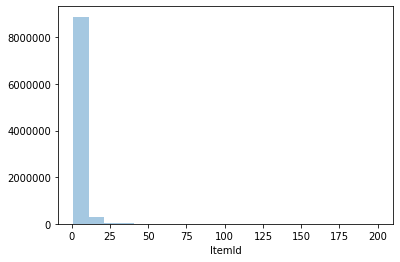

In [19]:
%%time
sns.distplot(df_clicks_sessionCount, kde=False, bins=20)

CPU times: user 240 ms, sys: 0 ns, total: 240 ms
Wall time: 241 ms


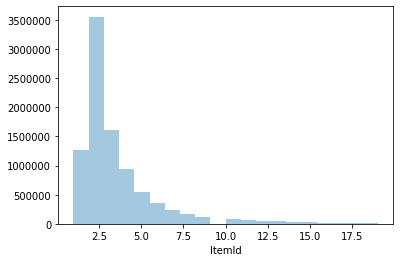

In [20]:
%%time
sns.distplot(df_clicks_sessionCount[df_clicks_sessionCount<20], kde=False, bins=20)

### Reading buy dataset

In [21]:
%%time
df_buys = pd.read_csv(PATH_TO_ORIGINAL_DATA + 'yoochoose-buys.dat', sep=',', header=None,
                  dtype={0:np.int32, 1:str, 2:np.int64, 3:np.int64, 4:np.int64})

CPU times: user 1.04 s, sys: 48 ms, total: 1.09 s
Wall time: 1.09 s


In [23]:
df_buys.columns = ["SessionId", "TimeStr", "ItemId", "Price", "Quantity"]

In [27]:
df_buys.drop(["TimeStr"], inplace=True, axis=1)

In [29]:
df_buys["Action"] = "BUY"

In [30]:
df_buys.head()

,SessionId,ItemId,Price,Quantity,Action
0,420374,214537888,12462,1,BUY
1,420374,214537850,10471,1,BUY
2,281626,214535653,1883,1,BUY
3,420368,214530572,6073,1,BUY
4,420368,214835025,2617,1,BUY


In [33]:
%%time
df = pd.merge(left=df_clicks, right=df_buys, how="left", on=["SessionId", "ItemId"])

CPU times: user 12.4 s, sys: 2.3 s, total: 14.7 s
Wall time: 14.7 s


In [34]:
df.shape, df_clicks.shape, df_buys.shape

((33234442, 7), (33003944, 4), (1150753, 5))

In [51]:
ItemId = 214821371
SessionId = 11

In [53]:
query = "ItemId==@ItemId & SessionId==@SessionId"

In [55]:
df.query(query)

,SessionId,TimeStr,ItemId,ItemType,Price,Quantity,Action
26,11,2014-04-03T10:45:29.873Z,214821371,NONE,1046.0,1.0,BUY
27,11,2014-04-03T10:45:29.873Z,214821371,NONE,1046.0,1.0,BUY
28,11,2014-04-03T10:46:12.162Z,214821371,NONE,1046.0,1.0,BUY
29,11,2014-04-03T10:46:12.162Z,214821371,NONE,1046.0,1.0,BUY
30,11,2014-04-03T10:46:57.355Z,214821371,NONE,1046.0,1.0,BUY
31,11,2014-04-03T10:46:57.355Z,214821371,NONE,1046.0,1.0,BUY


In [56]:
df_buys.query(query)

,SessionId,ItemId,Price,Quantity,Action
10,11,214821371,1046,1,BUY
11,11,214821371,1046,1,BUY


In [57]:
df_clicks.query(query)

,SessionId,TimeStr,ItemId,ItemType
26,11,2014-04-03T10:45:29.873Z,214821371,NONE
27,11,2014-04-03T10:46:12.162Z,214821371,NONE
28,11,2014-04-03T10:46:57.355Z,214821371,NONE


### Drop the duplicate rows

In [65]:
df.drop_duplicates(inplace=True)

### Refined data

Remove sessions of length less than a specific threshold and remove items that don't occur more than a specific threshold

In [89]:
SESSION_THRESHOLD = 10
ITEM_THRESHOLD = 50

In [76]:
session_lengths = df.groupby(["SessionId"]).size()

In [105]:
session_lengths_w_threshold = (session_lengths[session_lengths>SESSION_THRESHOLD])

In [106]:
len(session_lengths_w_threshold)

361141

In [112]:
session_lengths_w_threshold = session_lengths_w_threshold.reset_index()

In [116]:
%%time
df_with_session_threshold = df[df.SessionId.isin(session_lengths_w_threshold.SessionId)]

CPU times: user 2.84 s, sys: 492 ms, total: 3.33 s
Wall time: 3.33 s


In [117]:
df_with_session_threshold.head()

,SessionId,TimeStr,ItemId,ItemType,Price,Quantity,Action
24,11,2014-04-03T10:44:35.672Z,214821275,NONE,NaN,NaN,NaN
25,11,2014-04-03T10:45:01.674Z,214821275,NONE,NaN,NaN,NaN
26,11,2014-04-03T10:45:29.873Z,214821371,NONE,1046.0,1.0,BUY
28,11,2014-04-03T10:46:12.162Z,214821371,NONE,1046.0,1.0,BUY
30,11,2014-04-03T10:46:57.355Z,214821371,NONE,1046.0,1.0,BUY


In [119]:
df_with_session_threshold.shape

(6180236, 7)

In [120]:
item_lengths = df.groupby(["ItemId"]).size()
item_lengths_w_threshold = item_lengths[item_lengths>ITEM_THRESHOLD]
len(item_lengths_w_threshold)

21477

In [122]:
item_lengths_w_threshold = item_lengths_w_threshold.reset_index()

In [124]:
df_with_session_item_threshold = df_with_session_threshold[df_with_session_threshold.ItemId.isin(item_lengths_w_threshold.ItemId)]

In [125]:
df_with_session_item_threshold.shape

(6097854, 7)

In [126]:
session_lengths_2 = df_with_session_item_threshold.groupby(["SessionId"]).size()
session_lengths_2_w_threshold = (session_lengths_2[session_lengths_2 > SESSION_THRESHOLD])
len(session_lengths_2_w_threshold)

355238

In [127]:
session_lengths_2_w_threshold = session_lengths_2_w_threshold.reset_index()

In [128]:
%%time
df_final = df_with_session_item_threshold[df_with_session_item_threshold.SessionId.isin(session_lengths_2_w_threshold.SessionId)]

CPU times: user 724 ms, sys: 140 ms, total: 864 ms
Wall time: 865 ms


In [129]:
df_final.shape

(6050192, 7)

In [134]:
df_final.Action.fillna(value="CLICK", inplace=True)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [136]:
df_final.Quantity.fillna(value=0.0, inplace=True)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [152]:
df_final.Price.fillna(value=0.0, inplace=True)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [137]:
df_final.head()

,SessionId,TimeStr,ItemId,ItemType,Price,Quantity,Action
24,11,2014-04-03T10:44:35.672Z,214821275,NONE,NaN,0.0,CLICK
25,11,2014-04-03T10:45:01.674Z,214821275,NONE,NaN,0.0,CLICK
26,11,2014-04-03T10:45:29.873Z,214821371,NONE,1046.0,1.0,BUY
28,11,2014-04-03T10:46:12.162Z,214821371,NONE,1046.0,1.0,BUY
30,11,2014-04-03T10:46:57.355Z,214821371,NONE,1046.0,1.0,BUY


### Fixing time

In [138]:
%%time
df_final['Time'] = df_final.TimeStr.apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.%fZ').timestamp()) #This is not UTC. It does not really matter.

CPU times: user 1min 36s, sys: 24 ms, total: 1min 36s
Wall time: 1min 36s


/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [153]:
df_final.head()

,SessionId,ItemId,ItemType,Price,Quantity,Action,Time
24,11,214821275,NONE,0.0,0.0,CLICK,1.396522e+09
25,11,214821275,NONE,0.0,0.0,CLICK,1.396522e+09
26,11,214821371,NONE,1046.0,1.0,BUY,1.396522e+09
28,11,214821371,NONE,1046.0,1.0,BUY,1.396522e+09
30,11,214821371,NONE,1046.0,1.0,BUY,1.396522e+09


In [150]:
del(df_final["TimeStr"])

In [155]:
df_final.head(15)

,SessionId,ItemId,ItemType,Price,Quantity,Action,Time
24,11,214821275,NONE,0.0,0.0,CLICK,1.396522e+09
25,11,214821275,NONE,0.0,0.0,CLICK,1.396522e+09
26,11,214821371,NONE,1046.0,1.0,BUY,1.396522e+09
28,11,214821371,NONE,1046.0,1.0,BUY,1.396522e+09
30,11,214821371,NONE,1046.0,1.0,BUY,1.396522e+09
32,11,214717089,NONE,0.0,0.0,CLICK,1.396522e+09
33,11,214563337,NONE,0.0,0.0,CLICK,1.396522e+09
34,11,214706462,NONE,0.0,0.0,CLICK,1.396523e+09
35,11,214717436,NONE,0.0,0.0,CLICK,1.396523e+09
36,11,214743335,NONE,0.0,0.0,CLICK,1.396523e+09


In [156]:
df_final.ItemType.unique()

array(['NONE', 'PROMOTION', 'CATEGORY', 'BRAND'], dtype=object)

### Train and Validation Dataset

In [166]:
session_lengths_final = df_final.groupby(["SessionId"]).size()

In [167]:
session_lengths_final = session_lengths_final.reset_index()

In [169]:
session_lengths_final.columns = ["SessionId", "NumRows"]

In [174]:
session_lengths_final["length_70p"] =(session_lengths_final.NumRows*0.7).astype(np.int)

In [175]:
session_lengths_final.head()

,SessionId,NumRows,length_70p
0,11,12,8
1,22,16,11
2,33,16,11
3,46,12,8
4,87,27,18


In [184]:
%%time
df_final["RunningCount"] = df_final.groupby(["SessionId"]).cumcount()+1

CPU times: user 628 ms, sys: 288 ms, total: 916 ms
Wall time: 914 ms


/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [189]:
df_final.head()

,SessionId,ItemId,ItemType,Price,Quantity,Action,Time,RunningCount
24,11,214821275,NONE,0.0,0.0,CLICK,1.396522e+09,1
25,11,214821275,NONE,0.0,0.0,CLICK,1.396522e+09,2
26,11,214821371,NONE,1046.0,1.0,BUY,1.396522e+09,3
28,11,214821371,NONE,1046.0,1.0,BUY,1.396522e+09,4
30,11,214821371,NONE,1046.0,1.0,BUY,1.396522e+09,5


In [190]:
df_final_updated = pd.merge(left=df_final, right=session_lengths_final, on="SessionId", how="left")

In [191]:
df_final.shape, df_final_updated.shape

((6050192, 8), (6050192, 10))

In [194]:
df_final_updated.head(20)

,SessionId,ItemId,ItemType,Price,Quantity,Action,Time,RunningCount,NumRows,length_70p
0,11,214821275,NONE,0.0,0.0,CLICK,1.396522e+09,1,12,8
1,11,214821275,NONE,0.0,0.0,CLICK,1.396522e+09,2,12,8
2,11,214821371,NONE,1046.0,1.0,BUY,1.396522e+09,3,12,8
3,11,214821371,NONE,1046.0,1.0,BUY,1.396522e+09,4,12,8
4,11,214821371,NONE,1046.0,1.0,BUY,1.396522e+09,5,12,8
5,11,214717089,NONE,0.0,0.0,CLICK,1.396522e+09,6,12,8
6,11,214563337,NONE,0.0,0.0,CLICK,1.396522e+09,7,12,8
7,11,214706462,NONE,0.0,0.0,CLICK,1.396523e+09,8,12,8
8,11,214717436,NONE,0.0,0.0,CLICK,1.396523e+09,9,12,8
9,11,214743335,NONE,0.0,0.0,CLICK,1.396523e+09,10,12,8


In [197]:
df_train = df_final_updated[df_final_updated.RunningCount <= df_final_updated.length_70p].copy()
df_test = df_final_updated[df_final_updated.RunningCount > df_final_updated.length_70p].copy()

In [200]:
df_train.shape, df_test.shape

((4062820, 10), (1987372, 10))

In [205]:
df_train.drop(["RunningCount", "NumRows", "length_70p"], inplace=True, axis=1)
df_test.drop(["RunningCount", "NumRows", "length_70p"], inplace=True, axis=1)

In [206]:
df_train.head()

,SessionId,ItemId,ItemType,Price,Quantity,Action,Time
0,11,214821275,NONE,0.0,0.0,CLICK,1.396522e+09
1,11,214821275,NONE,0.0,0.0,CLICK,1.396522e+09
2,11,214821371,NONE,1046.0,1.0,BUY,1.396522e+09
3,11,214821371,NONE,1046.0,1.0,BUY,1.396522e+09
4,11,214821371,NONE,1046.0,1.0,BUY,1.396522e+09


In [207]:
df_test.head()

,SessionId,ItemId,ItemType,Price,Quantity,Action,Time
8,11,214717436,NONE,0.0,0.0,CLICK,1.396523e+09
9,11,214743335,NONE,0.0,0.0,CLICK,1.396523e+09
10,11,214826837,NONE,0.0,0.0,CLICK,1.396523e+09
11,11,214819762,NONE,0.0,0.0,CLICK,1.396523e+09
23,22,214821309,NONE,0.0,0.0,CLICK,1.396748e+09
